In [1]:
#!pip install matplotlib

In [2]:
!pip install tensorflow
!pip install seaborn

  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data loading and preprocessing

This data is readily available and already preprocessed in the keras library.

In [4]:
data = tf.keras.datasets.mnist.load_data()

In [5]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
(x_train, y_train), (x_test, y_test) = data

In [7]:
len(x_train)

60000

In [8]:
len(x_test)

10000

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# Standardizing x data

In [10]:
x_train_std = (x_train / 255)
x_test_std = (x_test / 255)

# Flattening the x data

In [11]:
x_train_flattened = x_train_std.reshape(len(x_train_std),28*28)
x_test_flattened = x_test_std.reshape(len(x_test_std),28*28)

In [12]:
x_test_flattened.shape

(10000, 784)

# Building, compiling and training the neural network model 

In [13]:
model = Sequential([
    Dense(100,input_shape=(784,),activation='relu'),
    Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2727 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1216 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0849 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0658 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9839


# Model evaluation

In [14]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0873 - accuracy: 0.9719


[0.08730949461460114, 0.9718999862670898]

In [15]:
x_test[2]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  38, 254, 109,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  87, 252,  82,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [16]:
y_pred = model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [17]:
y_pred[2]

array([2.7093764e-03, 9.9194121e-01, 2.0199503e-01, 2.5903082e-02,
       7.8823948e-03, 1.0496983e-02, 3.4629948e-02, 7.5693391e-02,
       3.8399523e-01, 9.4693492e-04], dtype=float32)

In [18]:
np.argmax(y_pred[2])

1

In [19]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)

Text(58.222222222222214, 0.5, 'Truth')

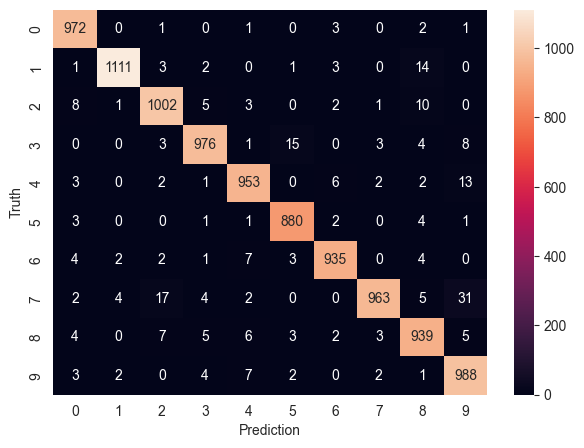

In [22]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')